# Identifying patterns and Trends in campus placements data using machine learning

Importing the libraries

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



Importing the dataset

In [325]:
cp=pd.read_csv('/content/collegePlace.csv')

In [326]:
cp.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [327]:
cp.shape

(2966, 8)

In [328]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [329]:
cp.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [330]:
cp.describe(include='O')

,Gender,Stream
count,2966,2966
unique,2,6
top,Male,Computer Science
freq,2475,776


In [331]:
cp.nunique()

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
PlacedOrNot           2
dtype: int64

Data cleaning

In [332]:
# Identifing null values
cp.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [333]:
def out(feature):
  sns.boxplot(feature)

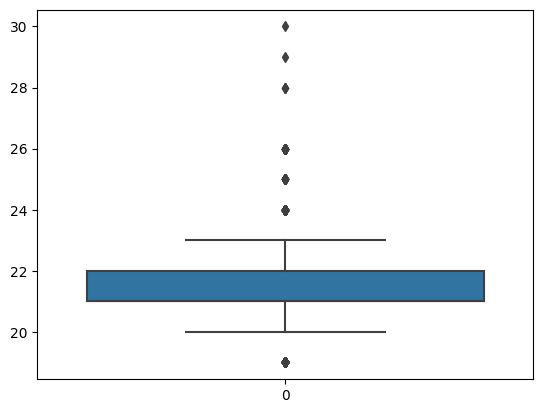

In [334]:
out(cp['Age'])

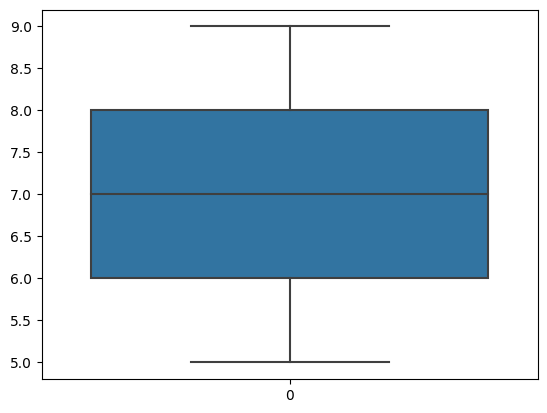

In [335]:
out(cp['CGPA'])

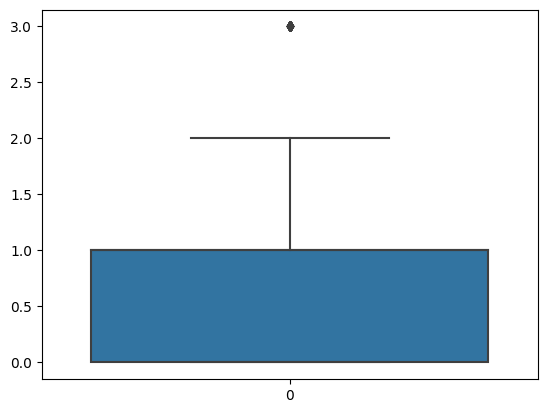

In [336]:
out(cp['Internships'])

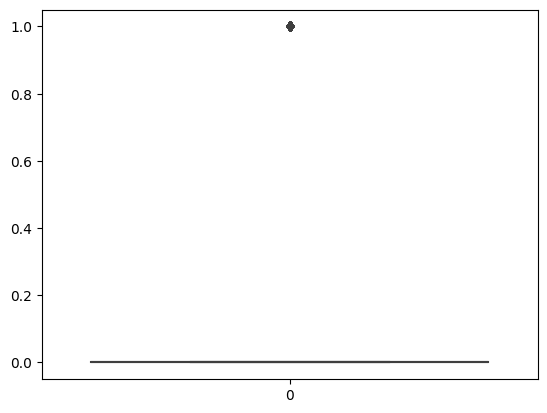

In [337]:
out(cp['HistoryOfBacklogs'])

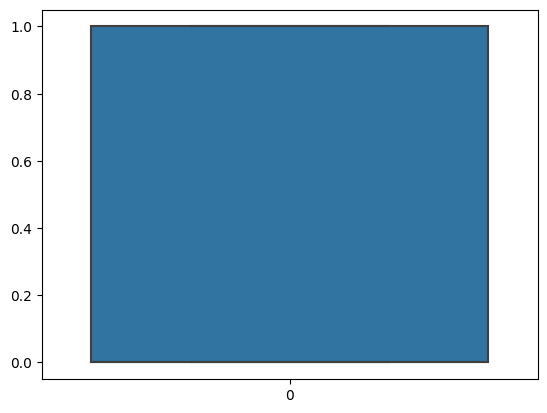

In [338]:
out(cp['Hostel'])

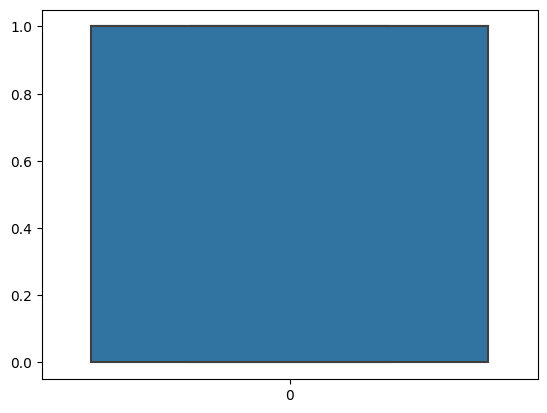

In [339]:
out(cp['PlacedOrNot'])

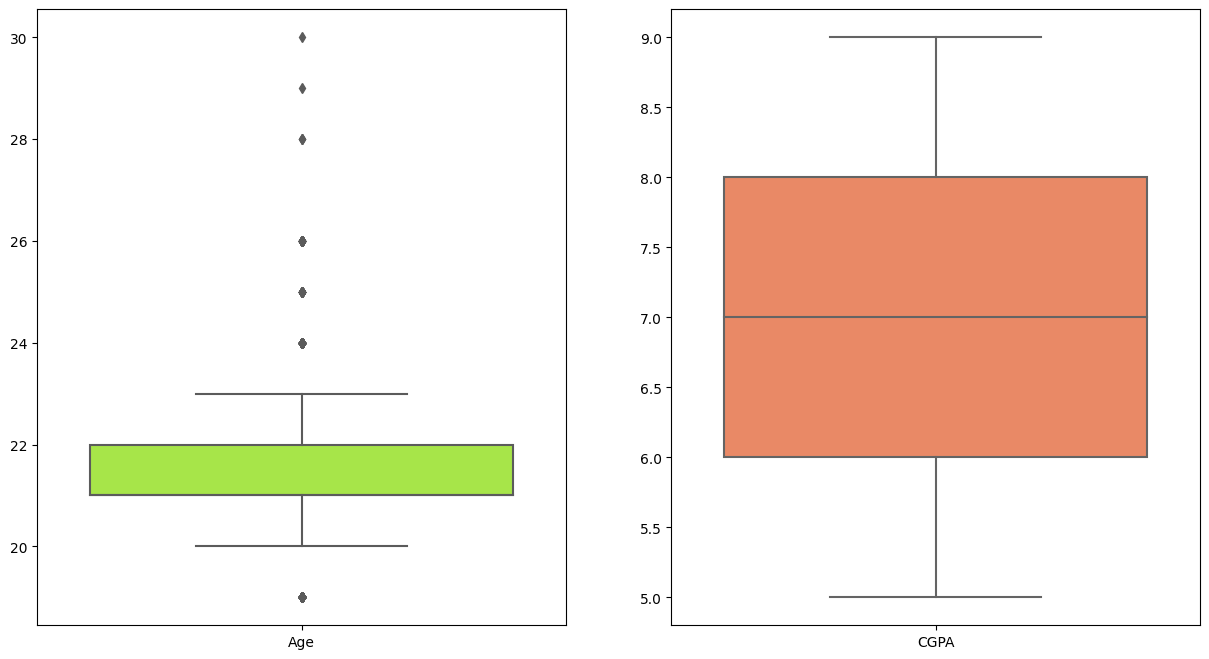

In [340]:
plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.boxplot(data=cp.iloc[:,:1],color='greenyellow')

plt.subplot(122)
# plt.title("CGPA")
sns.boxplot(data=cp[['CGPA']],color='coral')

plt.show()

<ipython-input-341-f2c67ab1547b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp['Age'],bins=12)


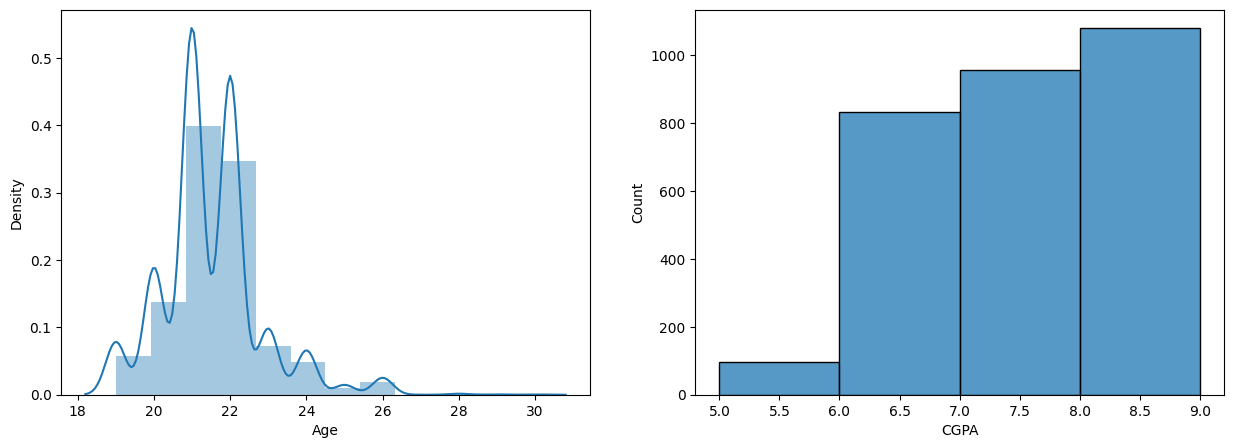

In [341]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.distplot(cp['Age'],bins=12)

plt.subplot(122)
sns.histplot(cp['CGPA'],bins=4)

plt.show()


from the above diagram we can say that

1.Age of students range from 19yrs to 30yr and majority of them being 21-22 year old.

2.Most of the students have scores near 7 CGPA and highest being 9 CGPA.


<Axes: xlabel='PlacedOrNot', ylabel='count'>

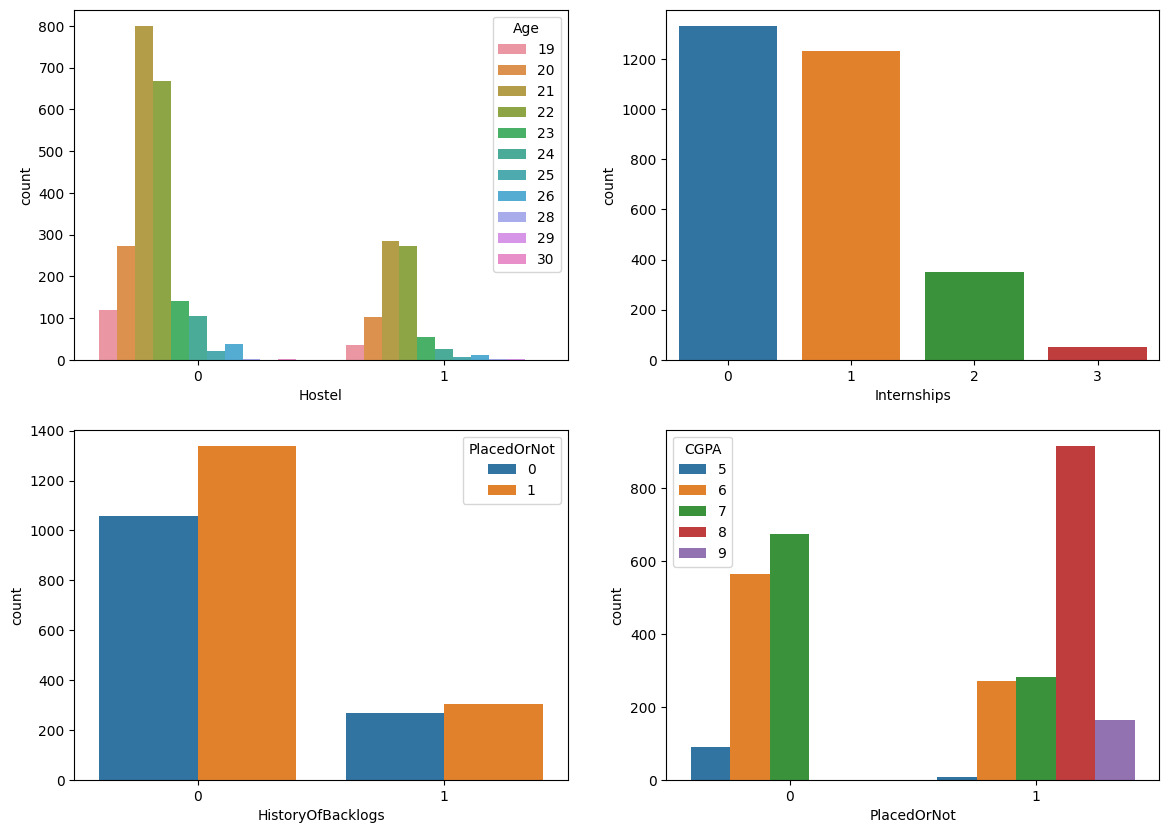

In [342]:
plt.subplots(2,2,figsize=(14,10))
plt.subplot(221)
sns.countplot(data=cp,x='Hostel',hue='Age')

plt.subplot(222)
sns.countplot(data=cp,x='Internships')

plt.subplot(223)
sns.countplot(data=cp,x='HistoryOfBacklogs',hue='PlacedOrNot')

plt.subplot(224)
sns.countplot(data=cp,x='PlacedOrNot',hue='CGPA')



1.Nearly 50% of students haven't done any internship while among the rest majority of them have done atleast 1 internship and some have even done 3.

2.About 25% of the total students were residing in hostel.

3.No of Blacklogs of students  who are not placed are majority than the Placed student.

4.Majority of students are placed who secured 8 CGPA.

<Axes: xlabel='Gender', ylabel='count'>

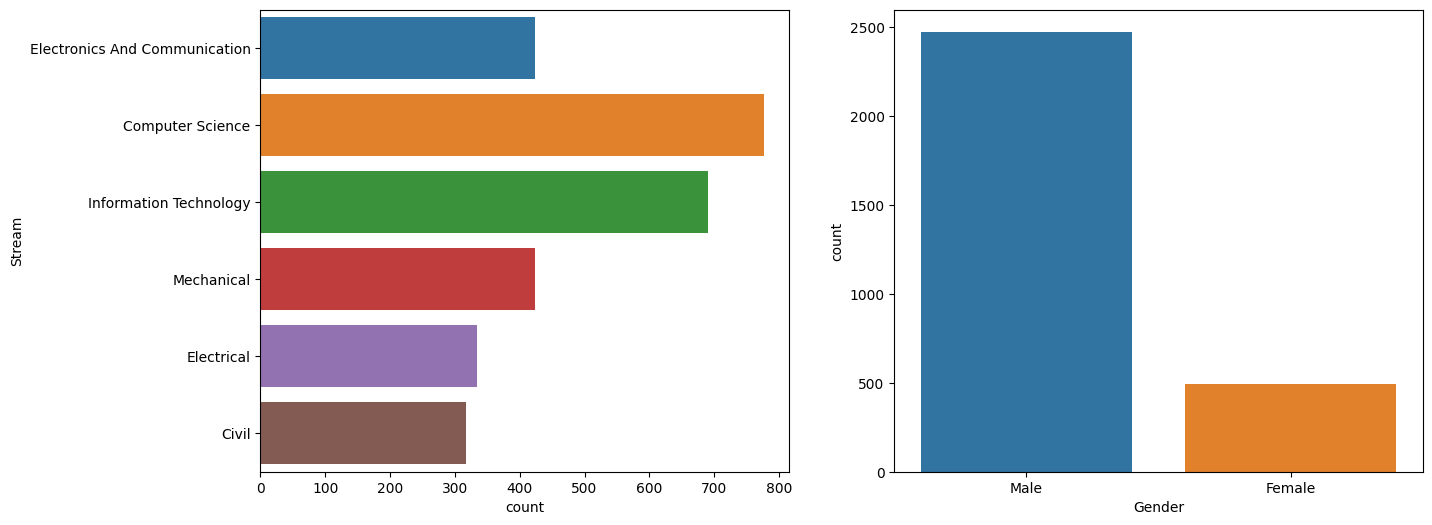

In [343]:
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.countplot(data=cp,y='Stream',orient='h')

plt.subplot(122)
sns.countplot(data=cp,x='Gender')

From the above diagram

1.Number of Male students is almost 5 times than that of the Female.

2.Majority of students are from CS and IT branches.

In [344]:
cp.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

Removing the unwanted data

In [345]:
cp=cp.drop(columns=['Age','Hostel'])

In [346]:
cp['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [347]:
cp.fillna(0)

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,Male,Electronics And Communication,1,8,1,1
1,Female,Computer Science,0,7,1,1
2,Female,Information Technology,1,6,0,1
3,Male,Information Technology,0,8,1,1
4,Male,Mechanical,0,8,0,1
...,...,...,...,...,...,...
2961,Male,Information Technology,0,7,0,0
2962,Male,Mechanical,1,7,0,0
2963,Male,Information Technology,1,7,0,0
2964,Male,Computer Science,1,7,0,0


In [348]:
from sklearn import preprocessing

performing LabelEncoding

In [349]:
le=preprocessing.LabelEncoder()
cp['Gender']=le.fit_transform(cp['Gender'])
cp['Stream']=le.fit_transform(cp['Stream'])

In [350]:
cp.head()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1


In [351]:
cp.describe()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.834457,2.562374,0.703641,7.073837,0.192178,0.552596
std,0.371732,1.653853,0.740197,0.967748,0.394079,0.497310
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,4.000000,1.000000,8.000000,0.000000,1.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [352]:
cp.groupby('HistoryOfBacklogs')['PlacedOrNot'].mean()

HistoryOfBacklogs
0    0.558013
1    0.529825
Name: PlacedOrNot, dtype: float64

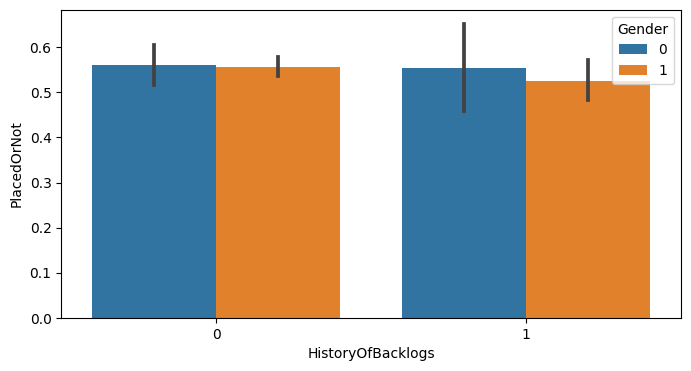

In [353]:
plt.figure(figsize=(8,4))
sns.barplot(x='HistoryOfBacklogs',y='PlacedOrNot',data=cp,hue='Gender',estimator=np.mean)
plt.show()

In [354]:
cp['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

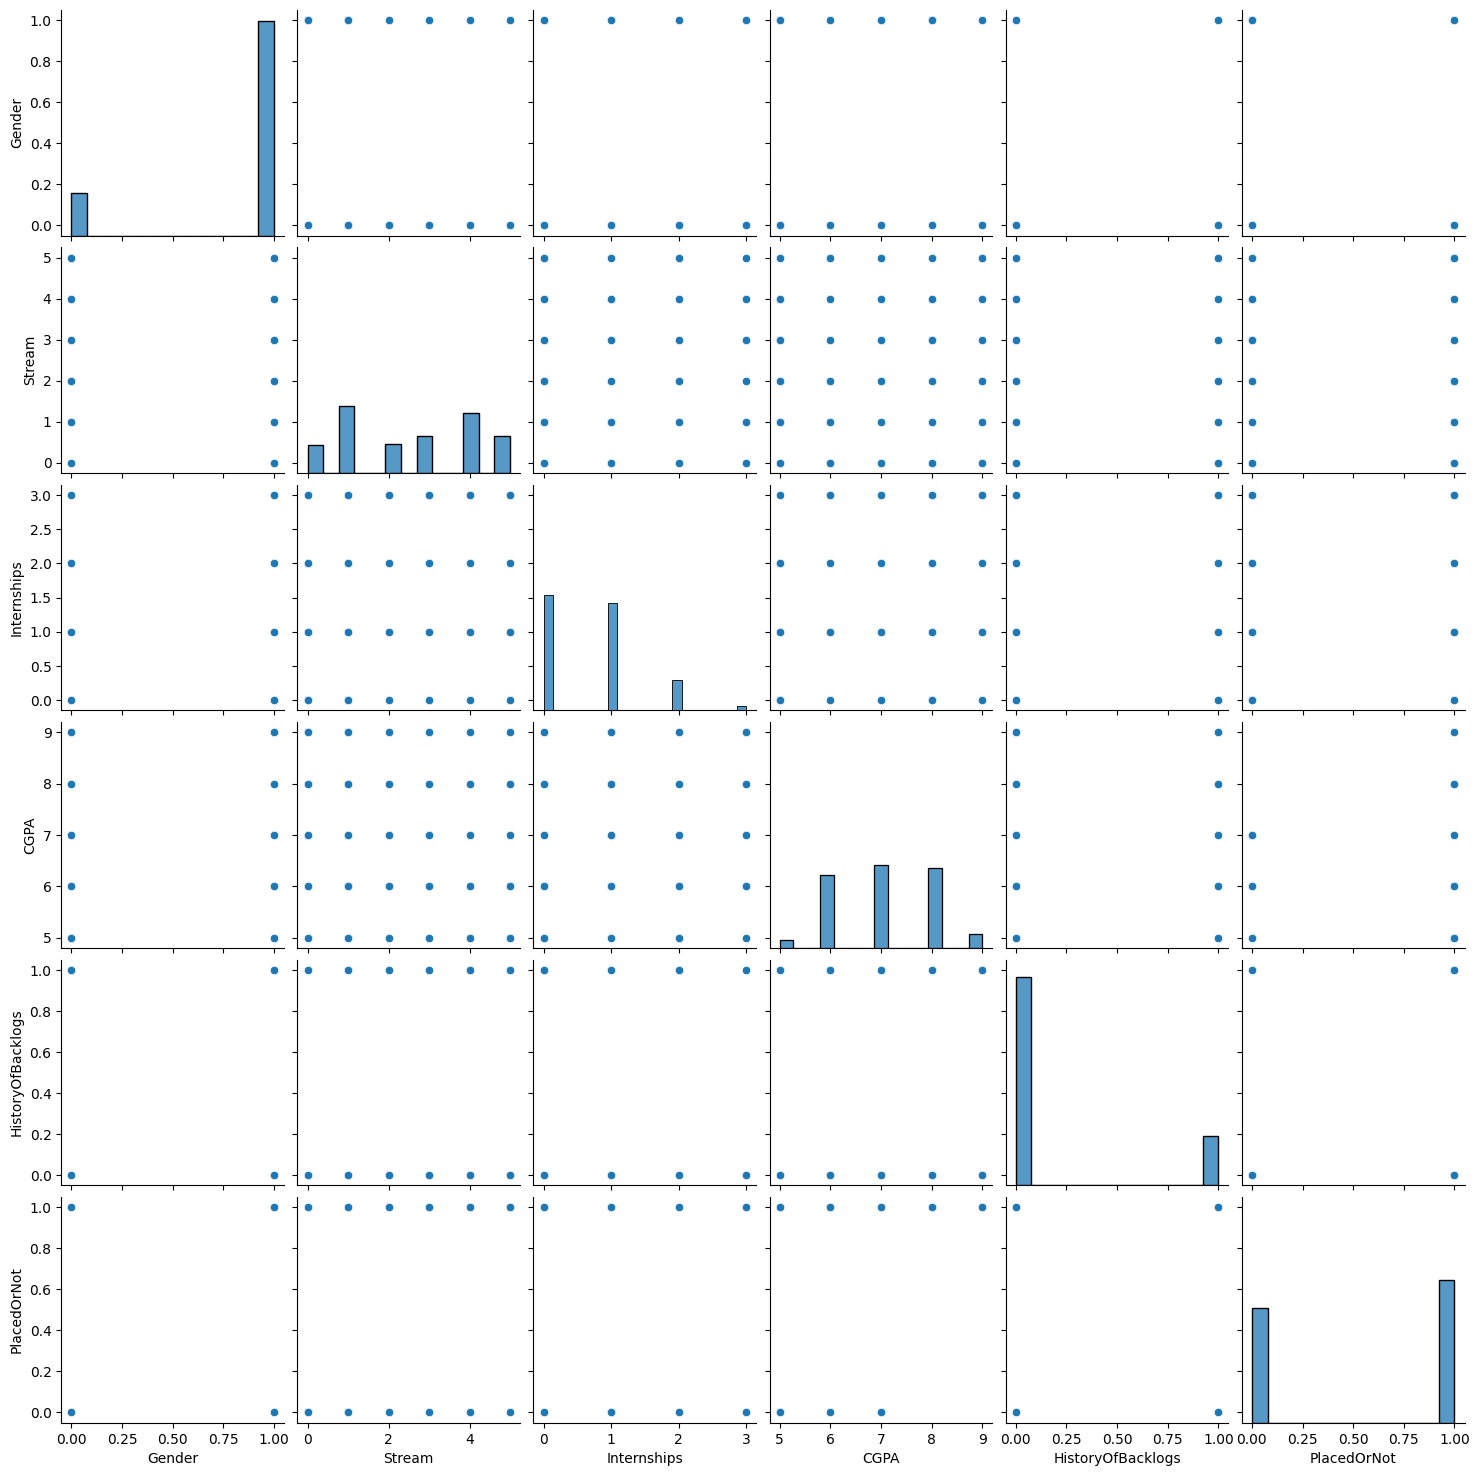

In [355]:
a=sns.pairplot(cp)


# correlation (heap map)

<Axes: >

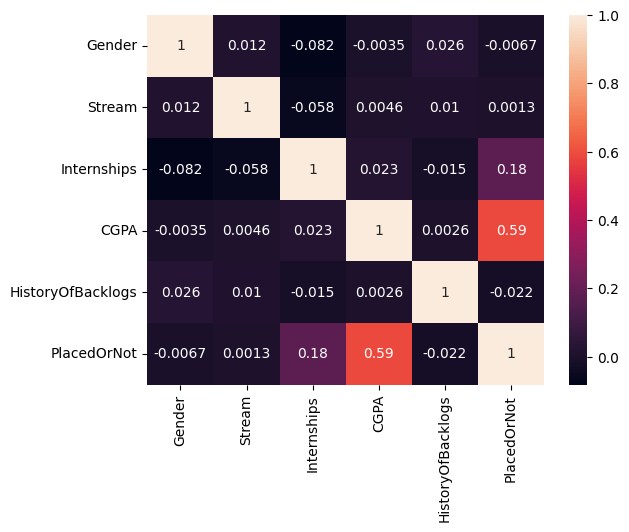

In [356]:
tc=cp.corr()
sns.heatmap(tc,annot=True)

seperating the data and labels

In [357]:
x=cp.drop(columns='PlacedOrNot')
x

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,1,3,1,8,1
1,0,1,0,7,1
2,0,4,1,6,0
3,1,4,0,8,1
4,1,5,0,8,0
...,...,...,...,...,...
2961,1,4,0,7,0
2962,1,5,1,7,0
2963,1,4,1,7,0
2964,1,1,1,7,0


In [358]:
y=cp['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

Splitting the data into Train data and Test data

In [359]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [360]:
print(x.shape,x_train.shape,x_test.shape)


(2966, 5) (2076, 5) (890, 5)


# Model Building

Importing the DecisionTreeClassfier

In [361]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [362]:
clf=clf.fit(x_train,y_train)


In [363]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [364]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[383,  13],
       [113, 381]])

Accuracy score

In [365]:
acc=metrics.accuracy_score(y_test,y_pred)
acc

0.8584269662921349

In [366]:
pre=metrics.precision_score(y_test,y_pred)
pre

0.9670050761421319

In [367]:
re=metrics.recall_score(y_test,y_pred)
re

0.771255060728745

In [368]:
f1=metrics.f1_score(y_test,y_pred)
f1

0.8581081081081081

Testing the Decision Tree Algorithm with some sample data

In [369]:
cp

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1
...,...,...,...,...,...,...
2961,1,4,0,7,0,0
2962,1,5,1,7,0,0
2963,1,4,1,7,0,0
2964,1,1,1,7,0,0


In [370]:
pred=clf.predict([[1,4,0,7,0]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Saving the Best Model

In [371]:
import pickle
pickle.dump(clf,open('decision.pkl','wb'))